In [1]:
import pandas as pd
import random
import os
import shutil


import random

def generate_random_numbers(num, numLen):
    while True:
        # Generate three sets of randomly permuted numbers from 1 to 5
        if numLen==14:
            set1 = random.sample(range(1, num+1), num)
            set2 = random.sample(range(1, num+1), num)
            set3 = random.sample(range(1, num+1), num)
                    # Concatenate the three sets
            concatenated_numbers = set1 + set2 + set3
        else:
            set1 = random.sample(range(1, num+1), num)
            set2 = random.sample(range(1, num+1), num)
            set3 = random.sample(range(1, num+1), num)
            set4 = random.sample(range(1, num+1), num)
            concatenated_numbers = set1 + set2 + set3 + set4



        # Drop the last number to make it a 14-digit number
        # Make sure that the length of sequence is numLen
        concatenated_numbers = concatenated_numbers[:numLen]

        # Check for consecutive identical numbers
        consecutive_check = any(
            abs(concatenated_numbers[i] - concatenated_numbers[i+1]) == 1 and
            abs(concatenated_numbers[i+1] - concatenated_numbers[i+2]) == 1
            for i in range(numLen-2)
        )

        # Check for repetitions of identical numbers
        repetitive_check = any(
            concatenated_numbers[i] == concatenated_numbers[i+1]
            for i in range(numLen-1)
        )

        if not consecutive_check and not repetitive_check:
            return concatenated_numbers

In [12]:
def generate_tgt_file(group_type, seq_type, block):
    # Set constant values
    iti_value = 2000
    stim_time_value = 15000
    prep_time_value = 3000
    feedback_value = 1

    # Generate 32 trials
    data = []
    random_horizons = generate_random_numbers(8,2)
    for k in range(2):
        random_numbers = generate_random_numbers(5, 14)

        # Create a row of data
       # row = [group_type, seq_type, feedback_value] + random_numbers + [''.join(map(str, random_numbers)), iti_value, random_horizons[k], stim_time_value, prep_time_value]
        row = [seq_type, feedback_value] + random_numbers + [''.join(map(str, random_numbers)), iti_value, random_horizons[k], stim_time_value, prep_time_value]

        # Append the row to the data list
        data.append(row)

    # Create a DataFrame using pandas
    #columns = ["groupType", "seqType", "feedback"] + [f"press{i}" for i in range(1, 15)] + ["cueP", "iti", "Horizon", "StimTime", "PrepTime"]
    columns = ["seqType", "feedback"] + [f"press{i}" for i in range(1, 15)] + ["cueP", "iti", "Horizon", "StimTime", "PrepTime"]

    df = pd.DataFrame(data, columns=columns)

    # Save the DataFrame to a CSV file with .tgt extension
    filename = f"ssh_a{group_type}_b{block}.tgt"
    df.to_csv(filename, sep='\t',  index=False)


#from google.colab import files
import numpy as np
# Specify the file path
for group_type in range(1,3):
    block = 1
    if group_type==1:
        seq_type = np.tile([1, 2],40)
    else:
        seq_type = np.tile([2, 1],40)
    for k in range(8):
        generate_tgt_file(group_type, seq_type[k], block)
        block = block+1
        #            file_path =  f"ssh_s{seq_type}_h{horizon}_b{block}.tgt"
                # Download the file
        #           files.download(file_path)

In [5]:
import numpy as np

np.tile([1, 2],40)

array([1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2])

array([3, 6, 2, 5, 8, 7, 1, 4, 7, 3, 2, 6, 4, 5, 1, 8, 4, 8, 2, 6, 1, 7,
       3, 5, 8, 2, 6, 7, 3, 1, 5, 4])

(array([320.,   0., 320.,   0.,   0., 320.,   0.,   0., 320.,   0.,   0.,
        320.,   0.,   0., 320.,   0.,   0., 320.,   0., 320.]),
 array([1.  , 1.35, 1.7 , 2.05, 2.4 , 2.75, 3.1 , 3.45, 3.8 , 4.15, 4.5 ,
        4.85, 5.2 , 5.55, 5.9 , 6.25, 6.6 , 6.95, 7.3 , 7.65, 8.  ]),
 <BarContainer object of 20 artists>)

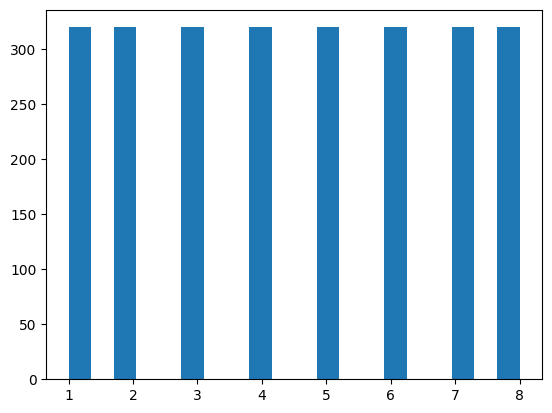

In [25]:
data = []
import matplotlib.pyplot as plt
for k in range(1,81):
    df = pd.read_csv(f'ssh_g2_b{k}.tgt', sep='\t')
    data.append(df['Horizon'].values)
plt.hist(np.concatenate(data),bins=20)

In [4]:
def generate_tgt_file_OLD(seq_type, block):
    # Set constant values
    iti_value = 2000
    stim_time_value = 15000
    prep_time_value = 3000
    feedback_value = 1

    # Generate 27 trials
    data = []
    random_horizons = generate_random_numbers(8, 27)
    for k in range(27):
        random_numbers = generate_random_numbers(5, 14)

        # Create a row of data
        row = [seq_type, feedback_value] + random_numbers + [''.join(map(str, random_numbers)), iti_value, random_horizons[k], stim_time_value, prep_time_value]

        # Append the row to the data list
        data.append(row)

    # Create a DataFrame using pandas
    columns = ["seqType", "feedback"] + [f"press{i}" for i in range(1, 15)] + ["cueP", "iti", "Horizon", "StimTime", "PrepTime"]
    df = pd.DataFrame(data, columns=columns)

    # Save the DataFrame to a CSV file with .tgt extension
    filename = f"ssh_s{seq_type}_b{block}.tgt"
    df.to_csv(filename, sep='\t',  index=False)


#from google.colab import files

# Specify the file path
block = 1
for _ in range(80):
    for seq_type in range(1,3):
        generate_tgt_file(seq_type, block)
        block = block+1
    #            file_path =  f"ssh_s{seq_type}_h{horizon}_b{block}.tgt"
            # Download the file
    #           files.download(file_path)